In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib as mpl

# Set to generic serif and bold
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['legend.fontsize'] = 'medium'

In [3]:
request_metrics_modified_booking_limit = pd.read_csv('modified_booking_limit/request_metrics_modified_booking_limit.csv')
request_metrics_sarathi = pd.read_csv('sarathi/request_metrics_sarathi.csv')
request_metrics_vllm = pd.read_csv('vllm/request_metrics_vllm.csv')
request_metrics_modified_nested_booking_limit = pd.read_csv('our_modified_booking_limit/request_metrics_our_modified_booking_limit.csv')
# request_metrics_new_modified_nested_booking_limit = pd.read_csv('new_modified_general_nested_booking_limit/request_metrics_modified_general_nested_booking_limit.csv')

throughput_modified_booking_limit_df = pd.read_csv('modified_booking_limit/throughput_modified_booking_limit.csv')
throughput_sarathi_df = pd.read_csv('sarathi/throughput_sarathi.csv')
throughput_vllm_df = pd.read_csv('vllm/throughput_vllm.csv')
throughput_modified_nested_booking_limit_df = pd.read_csv('our_modified_booking_limit/throughput_our_modified_booking_limit.csv')
# throughput_new_modified_nested_booking_limit_df = pd.read_csv('new_modified_general_nested_booking_limit/throughput_modified_general_nested_booking_limit.csv')

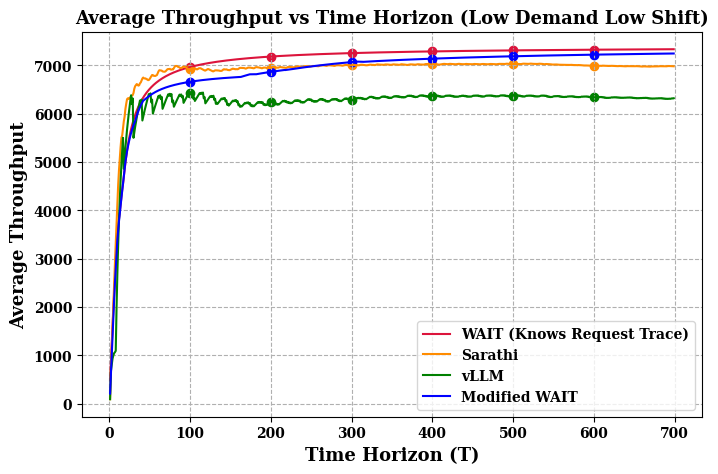

In [4]:
throughput_nested_booking_limit_col1 = throughput_modified_booking_limit_df['Time (sec)']
throughput_nested_booking_limit_col2 = throughput_modified_booking_limit_df['throughput']
throughput_sarathi_col1 = throughput_sarathi_df['Time (sec)']
throughput_sarathi_col2 = throughput_sarathi_df['throughput']
throughput_vllm_col1 = throughput_vllm_df['Time (sec)']
throughput_vllm_col2 = throughput_vllm_df['throughput']
throughput_modified_nested_booking_limit_col1 = throughput_modified_nested_booking_limit_df['Time (sec)']
throughput_modified_nested_booking_limit_col2 = throughput_modified_nested_booking_limit_df['throughput']
# throughput_new_modified_nested_booking_limit_col1 = throughput_new_modified_nested_booking_limit_df['Time (sec)']
# throughput_new_modified_nested_booking_limit_col2 = throughput_new_modified_nested_booking_limit_df['throughput']

avg_throughput_nested_booking_limit = throughput_nested_booking_limit_col2/throughput_nested_booking_limit_col1
avg_throughput_sarathi = throughput_sarathi_col2/throughput_sarathi_col1
avg_throughput_vllm = throughput_vllm_col2/throughput_vllm_col1
avg_throughput_modified_nested_booking_limit = throughput_modified_nested_booking_limit_col2/throughput_modified_nested_booking_limit_col1
# avg_throughput_new_modified_nested_booking_limit = throughput_new_modified_nested_booking_limit_col2/throughput_new_modified_nested_booking_limit_col1

T = np.arange(0, 700, 100)

plt.figure(figsize=(8,5))
plt.plot(avg_throughput_nested_booking_limit[:700], label = "WAIT (Knows Request Trace)", color= 'crimson')
plt.scatter(T[1:],[avg_throughput_nested_booking_limit[100],avg_throughput_nested_booking_limit[200],avg_throughput_nested_booking_limit[300],avg_throughput_nested_booking_limit[400],avg_throughput_nested_booking_limit[500],avg_throughput_nested_booking_limit[600]], color= 'crimson')
plt.plot(avg_throughput_sarathi[:700], label = "Sarathi", color = 'darkorange')
plt.scatter(T[1:],[avg_throughput_sarathi[100],avg_throughput_sarathi[200],avg_throughput_sarathi[300],avg_throughput_sarathi[400],avg_throughput_sarathi[500],avg_throughput_sarathi[600]], color= 'darkorange')
plt.plot(avg_throughput_vllm[:700], label = "vLLM", color = 'green')
plt.scatter(T[1:],[avg_throughput_vllm[100],avg_throughput_vllm[200],avg_throughput_vllm[300],avg_throughput_vllm[400],avg_throughput_vllm[500],avg_throughput_vllm[600]],  color= 'green')
plt.plot(avg_throughput_modified_nested_booking_limit[:700], label = "Modified WAIT", color = 'blue')
plt.scatter(T[1:],[avg_throughput_modified_nested_booking_limit[100],avg_throughput_modified_nested_booking_limit[200],avg_throughput_modified_nested_booking_limit[300],avg_throughput_modified_nested_booking_limit[400],avg_throughput_modified_nested_booking_limit[500],avg_throughput_modified_nested_booking_limit[600]],  color= 'blue')
# plt.plot(avg_throughput_new_modified_nested_booking_limit, label = "New Modified Nested WAIT", color = 'black')
plt.legend()
plt.ylabel("Average Throughput", fontweight='bold', fontsize=13)
# plt.xticks(T,fontsize=10)
# plt.yticks(fontsize=10)
plt.title("Average Throughput vs Time Horizon (Low Demand Low Shift)", fontsize=13, fontweight='bold')
plt.xlabel("Time Horizon (T)", fontweight='bold', fontsize=13)
plt.grid(True, linestyle='--')

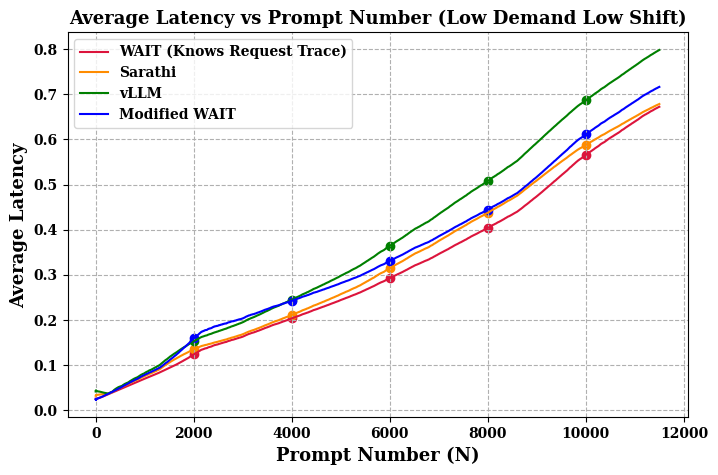

In [5]:
def avg_latency(arr):
    for i in range(len(arr)):
        arr[i]/=(i+1)
    return arr

e2e_time_modified_nested_booking_limit = avg_latency(np.cumsum(request_metrics_modified_nested_booking_limit['request_e2e_time_normalized']))
# e2e_time_new_modified_nested_booking_limit = avg_latency(np.cumsum(request_metrics_new_modified_nested_booking_limit['request_e2e_time_normalized']))
e2e_time_nested_booking_limit = avg_latency(np.cumsum(request_metrics_modified_booking_limit['request_e2e_time_normalized']))
e2e_time_sarathi = avg_latency(np.cumsum(request_metrics_sarathi['request_e2e_time_normalized']))
e2e_time_vllm = avg_latency(np.cumsum(request_metrics_vllm['request_e2e_time_normalized']))

T=np.arange(0,12000,2000)
plt.figure(figsize=(8,5))
plt.xlabel("Prompt Number (N)", fontweight='bold', fontsize=13)
plt.ylabel("Average Latency", fontweight='bold', fontsize=13)
# plt.plot(e2e_time_new_modified_nested_booking_limit, label = "New Modified Nested WAIT", color = 'black')
plt.plot(e2e_time_nested_booking_limit[:11500], label = "WAIT (Knows Request Trace)", color = 'crimson')
plt.scatter(T[1:],[e2e_time_nested_booking_limit[2000],e2e_time_nested_booking_limit[4000],e2e_time_nested_booking_limit[6000],e2e_time_nested_booking_limit[8000],e2e_time_nested_booking_limit[10000]], color= 'crimson')
plt.plot(e2e_time_sarathi[:11500], label = "Sarathi", color = 'darkorange')
plt.scatter(T[1:],[e2e_time_sarathi[2000],e2e_time_sarathi[4000],e2e_time_sarathi[6000],e2e_time_sarathi[8000],e2e_time_sarathi[10000]], color= 'darkorange')
plt.plot(e2e_time_vllm[:11500], label = "vLLM", color= 'green')
plt.scatter(T[1:],[e2e_time_vllm[2000],e2e_time_vllm[4000],e2e_time_vllm[6000],e2e_time_vllm[8000],e2e_time_vllm[10000]], color= 'green')
plt.plot(e2e_time_modified_nested_booking_limit[:11500], label = "Modified WAIT", color = 'blue')
plt.scatter(T[1:],[e2e_time_modified_nested_booking_limit[2000],e2e_time_modified_nested_booking_limit[4000],e2e_time_modified_nested_booking_limit[6000],e2e_time_modified_nested_booking_limit[8000],e2e_time_modified_nested_booking_limit[10000]], color= 'blue')
plt.title("Average Latency vs Prompt Number (Low Demand Low Shift)", fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--')
plt.legend()